# BioML: Model Training Experiment - SVM

Computational Identification of Protein Phosphorylation Sites

In [12]:
import sys
import os

# To import lib from grandparent directory
current_dir = os.getcwd()
grandparent_dir = os.path.abspath( os.path.join(current_dir, "../../") )
sys.path.append(grandparent_dir)

In [13]:
from lib import encoder, evaluate
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

### Hyperparameters

In [14]:
train_test_split_test_size = 0.2

### Loading data

In [15]:
Seqs = encoder.Encoder("../../dataset/31mer/test/positive_cd_hit50.test.fasta",
                       "../../dataset/31mer/test/negative_cd_hit50.test.fasta",
                       balance=True, upsample=True)
# Seqs = encoder.Encoder("../../dataset/31mer/provided_by_TA/positive_clustered_sequences.fasta",
#                        "../../dataset/31mer/provided_by_TA/negative_clustered_sequences.fasta",
#                        balance=True, upsample=True)

### Encoding

In [16]:
posOneHot, negOneHot = Seqs.ToOneHot()

X_data, y_data = encoder.GetLebel(posOneHot, negOneHot)
X_data = np.array(X_data)
y_data = np.array(y_data)
print(X_data.shape, y_data.shape)

(100, 31, 20) (100,)


### Train-test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=train_test_split_test_size, random_state=87)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 31, 20) (80,) (20, 31, 20) (20,)
(80, 620) (80,) (20, 620) (20,)


In [18]:
model = SVC(probability=True).fit(X_train, y_train)

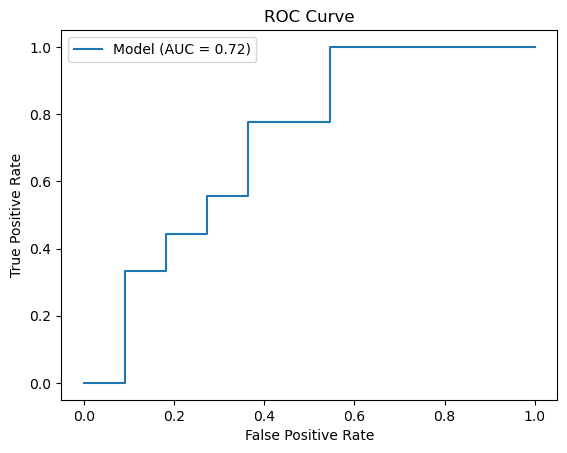

Best threshold: 0.5604285215189833
Accuracy: 0.5
Classification report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         9
           1       1.00      0.09      0.17        11

    accuracy                           0.50        20
   macro avg       0.74      0.55      0.40        20
weighted avg       0.76      0.50      0.38        20

Confusion matrix:
[[ 9  0]
 [10  1]]


In [20]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 0]
evaluate.Evaluation(y_test, y_proba)